## Exploratory data analysis for fridge product category

In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils import get_project_root

category_id = '18852759'


### Load dataset

In [2]:
df = pd.read_csv(os.path.join(get_project_root(), f'data/{category_id}_working_dataset.csv'))

### Display informarion about dataset and view sample

In [3]:
df.head()

,id,price,brand,name,ratingAverage,ratingCount,reviewCount,minPurchaseCount,recommendationRate,complaintRate,ratings
0,7599894,6052.64,Siguro,Siguro BF-J140Y Arctic,4.6,27,13,200,0.85,0.0000,"[1, 0, 3, 2, 21]"
1,6153388,11539.45,BEKO,BEKO BCNA306E3SN,4.7,3,0,200,1.00,0.0149,"[0, 0, 0, 1, 2]"
2,6776815,18990.00,LG,LG GBP62PZNBC,4.8,38,21,500,0.95,0.0039,"[0, 1, 1, 4, 32]"
3,7665816,35927.20,HISENSE,HISENSE RQ760N4AFE,5.0,1,0,10,1.00,0.0000,"[0, 0, 0, 0, 1]"
4,7599893,6096.49,Siguro,Siguro BF-J140S Arctic,4.6,27,13,200,0.85,0.0020,"[1, 0, 3, 2, 21]"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 11 columns):
id                    1085 non-null int64
price                 1085 non-null float64
brand                 1085 non-null object
name                  1085 non-null object
ratingAverage         549 non-null float64
ratingCount           1085 non-null int64
reviewCount           1085 non-null int64
minPurchaseCount      1085 non-null int64
recommendationRate    549 non-null float64
complaintRate         1085 non-null float64
ratings               1085 non-null object
dtypes: float64(4), int64(4), object(3)
memory usage: 93.4+ KB


In [5]:
wrk_df = df[['price',
             'brand',
             'ratingAverage',
             'ratingCount',
             'reviewCount',
             'minPurchaseCount',
             'recommendationRate',
             'complaintRate']]
wrk_df

,price,brand,ratingAverage,ratingCount,reviewCount,minPurchaseCount,recommendationRate,complaintRate
0,6052.64,Siguro,4.6,27,13,200,0.85,0.0000
1,11539.45,BEKO,4.7,3,0,200,1.00,0.0149
2,18990.00,LG,4.8,38,21,500,0.95,0.0039
3,35927.20,HISENSE,5.0,1,0,10,1.00,0.0000
4,6096.49,Siguro,4.6,27,13,200,0.85,0.0020
...,...,...,...,...,...,...,...,...
1080,16170.05,Concept,5.0,1,0,20,1.00,0.0000
1081,14990.00,Concept,NaN,0,0,20,NaN,0.0357
1082,10666.74,Concept,NaN,0,0,0,NaN,0.0000
1083,14553.18,Concept,NaN,0,0,0,NaN,0.0000


### Display descriptive statistics

In [6]:
wrk_df.describe().round(2)

,price,ratingAverage,ratingCount,reviewCount,minPurchaseCount,recommendationRate,complaintRate
count,1085.00,549.00,1085.00,1085.00,1085.00,549.00,1085.00
mean,18938.96,4.40,3.10,1.37,80.62,0.85,0.00
std,14077.94,0.86,6.63,3.07,187.33,0.27,0.01
min,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,9797.43,4.20,0.00,0.00,0.00,0.80,0.00
50%,15592.06,4.70,1.00,0.00,10.00,1.00,0.00
75%,23111.15,5.00,3.00,1.00,100.00,1.00,0.00
max,147897.48,5.00,67.00,40.00,2000.00,1.00,0.08


### Check for NaN values

In [7]:
df.isna().sum()

id                      0
price                   0
brand                   0
name                    0
ratingAverage         536
ratingCount             0
reviewCount             0
minPurchaseCount        0
recommendationRate    536
complaintRate           0
ratings                 0
dtype: int64

### Check numbers of unique values per each attribute

In [8]:
df.nunique()

id                    1085
price                  940
brand                   48
name                  1055
ratingAverage           24
ratingCount             35
reviewCount             21
minPurchaseCount         9
recommendationRate      33
complaintRate          169
ratings                151
dtype: int64

### Check whether there is any correlation between following attributes

1. There is a strong correlation between attributes **ratingAverage** and **recommendationRate**, which is logical, as products with higher ratings are more recommended

2. There is a strong correlation between attributes **ratingCount**, **reviewCount** and **minPurchaseCount**, which is logical, as
* people, who write reviews leave rating as well (it is not possible to leave review without rating)
* products with higher purchase count have more chance to get more ratings and reviews (as per shop it is not possible to rate the product you have not purchased)
* vice cersa - products with more/higher ratings are more likely to be putchased by others

In [9]:
corr_check_df = wrk_df.corr()
corr_check_df

,price,ratingAverage,ratingCount,reviewCount,minPurchaseCount,recommendationRate,complaintRate
price,1.000000,-0.004036,-0.204759,-0.178362,-0.248079,-0.006789,-0.109501
ratingAverage,-0.004036,1.000000,0.117334,0.105158,0.050789,0.903585,-0.032335
ratingCount,-0.204759,0.117334,1.000000,0.939231,0.742212,0.104971,0.219200
reviewCount,-0.178362,0.105158,0.939231,1.000000,0.674571,0.088963,0.204607
minPurchaseCount,-0.248079,0.050789,0.742212,0.674571,1.000000,0.052268,0.227276
recommendationRate,-0.006789,0.903585,0.104971,0.088963,0.052268,1.000000,-0.045281
complaintRate,-0.109501,-0.032335,0.219200,0.204607,0.227276,-0.045281,1.000000


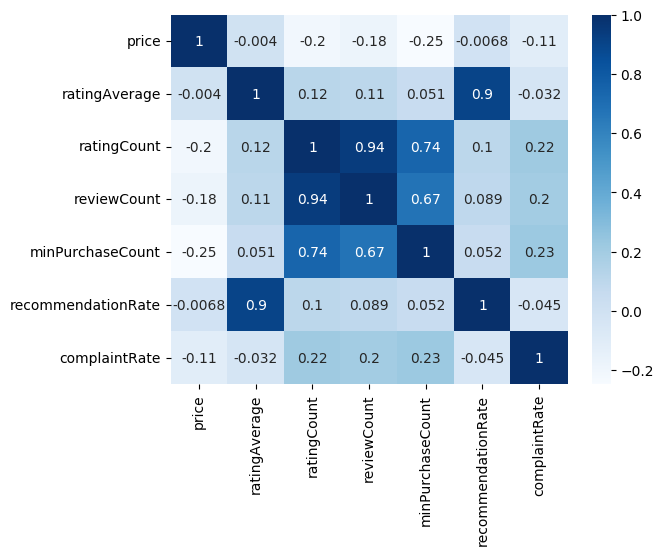

<Figure size 800x600 with 0 Axes>

In [10]:
sns.heatmap(corr_check_df, annot=True, annot_kws={'size': 10}, cmap='Blues')
plt.figure(figsize=(8, 6))

plt.show()

### Check how many models has each brand

In [42]:
pd.DataFrame(df[['brand', 'name']].groupby('brand')['name'].count()).sort_index(axis=2, ascending=False)
# .sort_values(by='name', ascending=False)

ValueError: No axis named 2 for object type <class 'pandas.core.frame.DataFrame'>

### Get top brands in following categories:
1. highest/lowest minimum purchase
2. highest/lowest average rating
3. highest/lowest price

In [11]:
statistics_by_brand_df = wrk_df.groupby('brand').mean().round(2)

**Average rating**

In [12]:
print('\n', 'Top 10 brands with highest average rating in fridge product category', '\n')
display(statistics_by_brand_df.sort_values(by='ratingAverage', ascending=False).head(10))

print('\n', 'Top 10 brands with lowest average rating in fridge product category', '\n')
display(statistics_by_brand_df.sort_values(by='ratingAverage', ascending=True).head(10))


 Top 10 brands with highest average rating in fridge product category 



,price,ratingAverage,ratingCount,reviewCount,minPurchaseCount,recommendationRate,complaintRate
brand,,,,,,,
Maxxo,12918.39,5.00,0.50,0.00,20.00,1.00,0.00
Smeg,43634.22,5.00,0.67,0.00,0.00,1.00,0.00
MIDEA,11553.08,5.00,5.00,3.00,100.00,1.00,0.00
MORA,9355.14,4.97,3.00,1.00,64.29,1.00,0.00
Orava,7078.55,4.90,1.33,0.33,66.67,1.00,0.00
SEVERIN,11321.70,4.89,1.27,0.67,6.33,0.94,0.00
LG,26125.41,4.66,6.42,3.24,100.61,0.95,0.00
GORENJE,14237.29,4.65,10.95,5.48,235.41,0.92,0.01
Hyundai,3407.22,4.60,6.67,1.67,566.67,1.00,0.00



 Top 10 brands with lowest average rating in fridge product category 



,price,ratingAverage,ratingCount,reviewCount,minPurchaseCount,recommendationRate,complaintRate
brand,,,,,,,
Vestfrost,23261.33,3.00,0.18,0.00,0.91,0.50,0.00
FAGOR,15172.00,3.00,1.00,0.20,18.00,0.50,0.00
Nedis,3278.12,3.50,1.50,0.50,50.00,0.50,0.02
CHiQ,7082.41,3.70,1.50,1.00,25.00,0.67,0.00
SIEMENS,22049.15,3.74,0.61,0.57,19.13,0.54,0.00
AEG,20807.33,3.75,0.88,0.53,19.71,0.70,0.01
GODDESS,5555.88,3.94,2.80,1.30,137.00,0.77,0.00
SNAIGE,11473.45,3.95,0.51,0.22,47.32,0.75,0.00
Ukonic,2060.70,4.00,40.00,15.00,2000.00,0.70,0.02


**Number of purchases**

In [13]:
print('\n', 'Top 10 brands with highest average number of purchases in fridge product category', '\n')
display(statistics_by_brand_df.sort_values(by='minPurchaseCount', ascending=False).head(10))

print('\n', 'Top 10 brands with lowest average number of purchases in fridge product category', '\n')
display(statistics_by_brand_df.sort_values(by='minPurchaseCount', ascending=True).head(10))


 Top 10 brands with highest average number of purchases in fridge product category 



,price,ratingAverage,ratingCount,reviewCount,minPurchaseCount,recommendationRate,complaintRate
brand,,,,,,,
Ukonic,2060.70,4.00,40.00,15.00,2000.00,0.70,0.02
Hyundai,3407.22,4.60,6.67,1.67,566.67,1.00,0.00
Siguro,6305.59,4.53,18.53,7.73,292.00,0.89,0.00
BEKO,11571.12,4.19,5.49,1.77,246.98,0.74,0.01
GORENJE,14237.29,4.65,10.95,5.48,235.41,0.92,0.01
AMICA,8359.41,4.59,10.44,3.97,220.00,0.90,0.01
WHIRLPOOL,16317.79,4.11,4.82,2.13,178.00,0.78,0.01
CANDY,8533.48,4.39,3.78,1.65,161.89,0.86,0.00
GODDESS,5555.88,3.94,2.80,1.30,137.00,0.77,0.00



 Top 10 brands with lowest average number of purchases in fridge product category 



,price,ratingAverage,ratingCount,reviewCount,minPurchaseCount,recommendationRate,complaintRate
brand,,,,,,,
HITACHI,61896.47,NaN,0.00,0.0,0.00,NaN,0.0
Toshiba,19104.12,NaN,0.00,0.0,0.00,NaN,0.0
Smeg,43634.22,5.0,0.67,0.0,0.00,1.0,0.0
BRANDT,17609.88,NaN,0.00,0.0,0.00,NaN,0.0
Sharp,34779.23,NaN,0.00,0.0,0.00,NaN,0.0
Grundig,20943.27,NaN,0.00,0.0,0.00,NaN,0.0
Kluge,18419.26,NaN,0.00,0.0,0.00,NaN,0.0
FRANKE,27624.01,NaN,0.00,0.0,0.00,NaN,0.0
Miele,38138.18,NaN,0.00,0.0,0.36,NaN,0.0


**Average price**

In [14]:
print('\n', 'Top 10 brands with highest average price in fridge product category', '\n')
display(statistics_by_brand_df.sort_values(by='price', ascending=False).head(10))

print('\n', 'Top 10 brands with lowest average price in fridge product category', '\n')
display(statistics_by_brand_df.sort_values(by='price', ascending=True).head(10))


 Top 10 brands with highest average price in fridge product category 



,price,ratingAverage,ratingCount,reviewCount,minPurchaseCount,recommendationRate,complaintRate
brand,,,,,,,
HITACHI,61896.47,NaN,0.00,0.00,0.00,NaN,0.0
Smeg,43634.22,5.00,0.67,0.00,0.00,1.00,0.0
Miele,38138.18,NaN,0.00,0.00,0.36,NaN,0.0
Sharp,34779.23,NaN,0.00,0.00,0.00,NaN,0.0
LIEBHERR,29165.41,4.40,0.38,0.12,15.18,0.85,0.0
FRANKE,27624.01,NaN,0.00,0.00,0.00,NaN,0.0
HAIER,27389.65,4.51,1.02,0.58,15.11,0.86,0.0
LG,26125.41,4.66,6.42,3.24,100.61,0.95,0.0
Vestfrost,23261.33,3.00,0.18,0.00,0.91,0.50,0.0



 Top 10 brands with lowest average price in fridge product category 



,price,ratingAverage,ratingCount,reviewCount,minPurchaseCount,recommendationRate,complaintRate
brand,,,,,,,
Ukonic,2060.70,4.00,40.00,15.00,2000.00,0.70,0.02
Nedis,3278.12,3.50,1.50,0.50,50.00,0.50,0.02
Hyundai,3407.22,4.60,6.67,1.67,566.67,1.00,0.00
Klarstein,5496.80,4.50,0.83,0.33,10.00,0.83,0.00
GODDESS,5555.88,3.94,2.80,1.30,137.00,0.77,0.00
Siguro,6305.59,4.53,18.53,7.73,292.00,0.89,0.00
GUZZANTI,6488.39,4.32,3.04,1.18,98.57,0.79,0.00
Orava,7078.55,4.90,1.33,0.33,66.67,1.00,0.00
CHiQ,7082.41,3.70,1.50,1.00,25.00,0.67,0.00


### Check distribution

**Niether of the columns data has normal destribution**

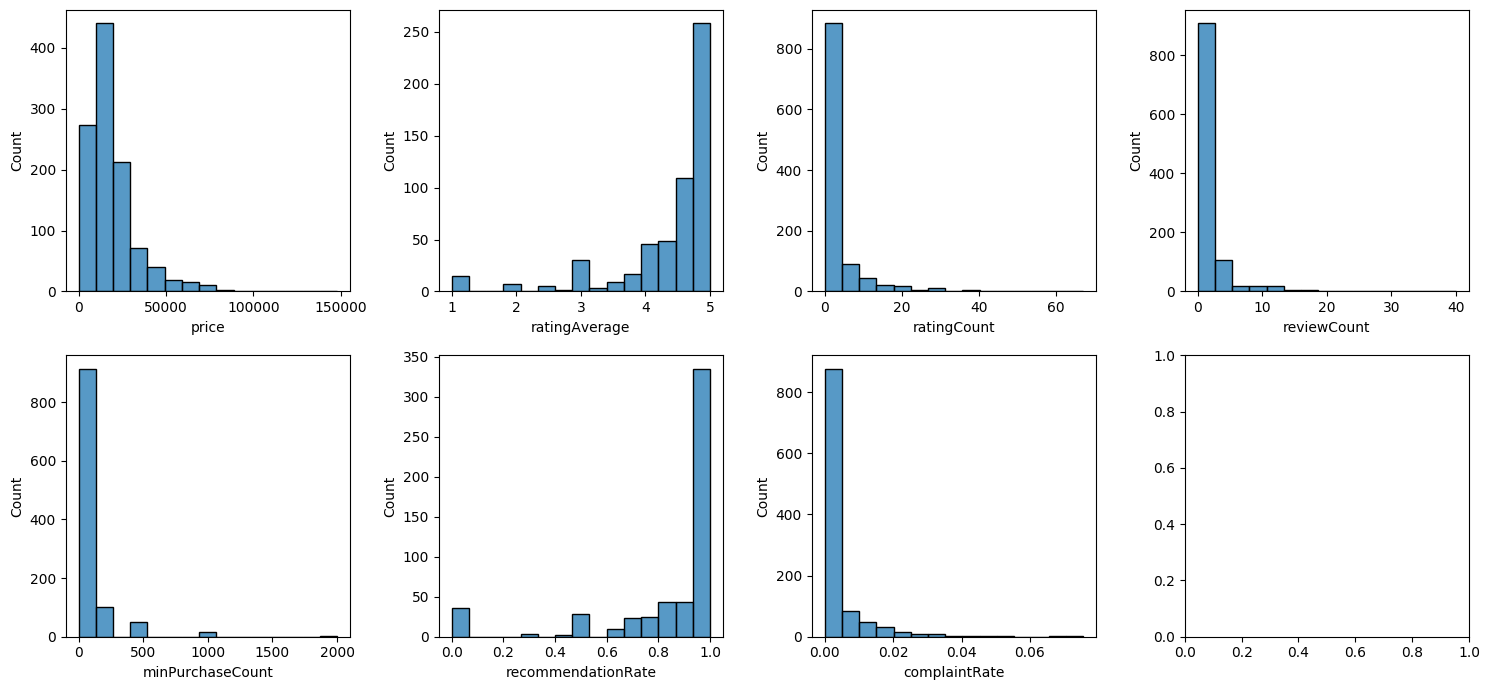

In [30]:
viz_df = df[['price', 'ratingAverage', 'ratingCount', 'reviewCount','minPurchaseCount', 'recommendationRate', 'complaintRate']]

num_columns = len(viz_df.columns)
fig, axs = plt.subplots(2,4, figsize=(15,7))
axs = axs.flatten()

for i, col in enumerate(viz_df.columns):
   sns.histplot(ax=axs[i], data=viz_df[col], bins=15)

plt.tight_layout()
plt.show()

### Check for outliers

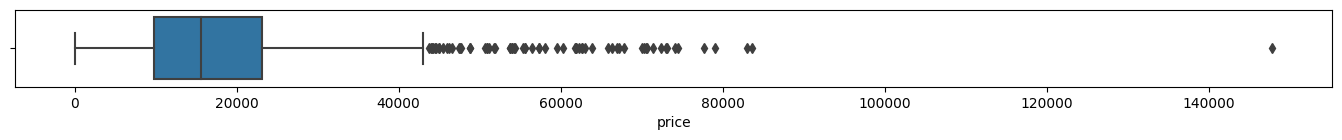

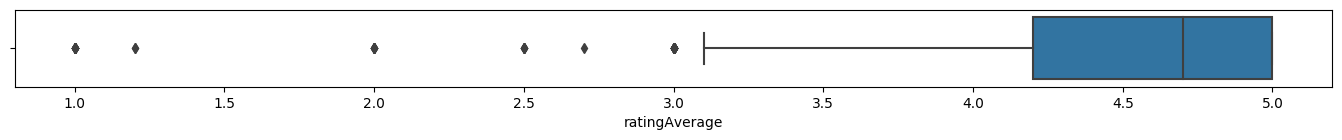

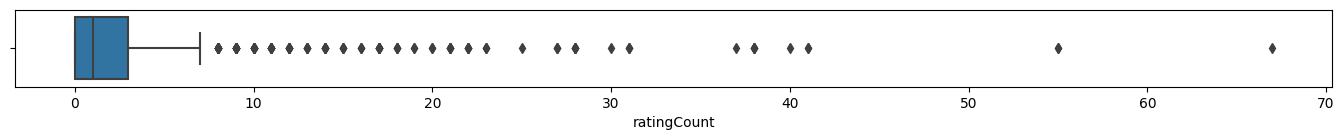

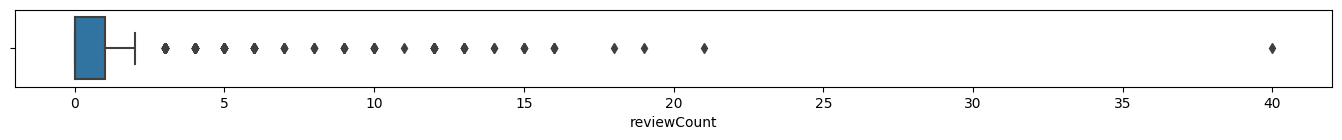

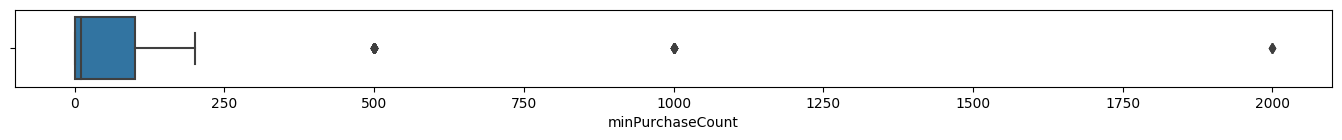

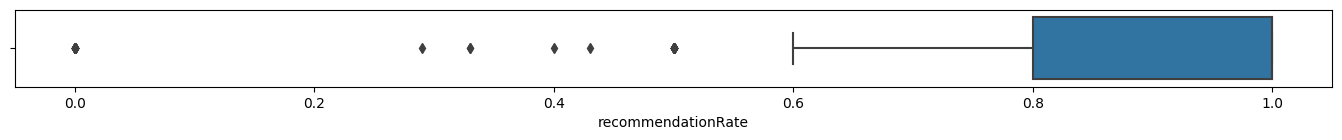

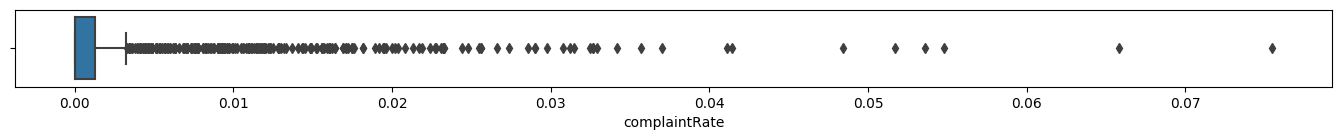

In [28]:
for column in viz_df:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=viz_df, x=column)